In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('all/train.csv')
df_test = pd.read_csv('all/test.csv')

Here is the <a href='https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard'>kernel by Serigne</a> that explains well the procedure of imputing missing values for this dataset. I'm following the instructions from that kernel.  

The transformation of the DataFrame include the following steps:
- imputting missing values
- dropping several columns
- transforming several numerical values to categorial
- log-transform of the target variable and 'LotArea'

In [74]:
def FillWithNone(df,s_list):
    n = len(s_list)
    for i in range (n):
        df[s_list[i]].fillna('None',inplace=True)  

def FillWith0(df,s_list):
    n = len(s_list)
    for i in range (n):
        df[s_list[i]].fillna(0,inplace=True)  
        
def ToStrType(df,s_list):
    n = len(s_list)
    for i in range (n):
        df[s_list[i]] = df[s_list[i]].astype(str)  
        
def DropProblem(df,s_list):
    n = len(s_list)
    for i in range (n):
        df.drop([s_list[i]],axis=1,inplace=True)

# Transform DataFrame
# - imput missing values
# - drop several columns
# - log-transform the target variable
# - transform some numerical values to categorial
def TransformDataFrame(df):
    # this missing data is filled as described in the 
    # Serigne's kernel
    s_fill_None=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
                'GarageType','GarageFinish','GarageQual','GarageCond',
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                'BsmtFinType2','MasVnrType','MSSubClass']
    s_fill_0=['GarageArea','GarageCars','BsmtFinSF1', 'BsmtFinSF2', 
              'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
              'MasVnrArea']
    s_to_str=['MSSubClass','OverallCond']
    FillWithNone(df,s_fill_None)
    FillWith0(df,s_fill_0)
    ToStrType(df,s_to_str)
    df['Functional'].fillna('Typ',inplace=True)
    df['Electrical'].fillna('SBrkr',inplace=True) # 1334
    df['Exterior1st'].fillna('VinylSd',inplace=True) # 515
    df['Exterior2nd'].fillna('VinylSd',inplace=True) # 504
    df['SaleType'].fillna('WD',inplace=True) # 1267
    df['MSZoning'].fillna('RL',inplace=True) # 1151
    df.drop(['Utilities'],axis=1,inplace=True)
    df['LotArea'] = df['LotArea'].apply(lambda x: np.log1p(x))
    df.drop(['GarageYrBlt'],axis=1,inplace=True) # highly correlated with YearBuilt
    df.drop(['LotFrontage'],axis=1,inplace=True) # too many values are missing
    df['KitchenQual'].fillna('miss',inplace=True) # no value significantly outnumbers others
    
    s_to_drop_problem=['MSSubClass','Condition2','HouseStyle','RoofMatl',
                      'Exterior1st','Exterior2nd','Heating','Electrical',
                      'KitchenQual','GarageQual','PoolQC','MiscFeature']
    DropProblem(df,s_to_drop_problem)
    
# Transform DataFrame
TransformDataFrame(df)
TransformDataFrame(df_test)
df['SalePrice'] = df['SalePrice'].apply(lambda x: np.log1p(x))

print(df.shape)
print(df_test.shape)

(1460, 66)
(1459, 65)


In [75]:
strListObj = df.select_dtypes(include='object').columns.values
nObj=strListObj.size

def Compare(np1,np2):
    if (np1.size!=np2.size):
        print('DIFFERENT')
        return 0
    n = np1.size
    for i in range(n):
        eq=0
        for j in range(n):
            if (np1[i]==np2[j]): 
                eq=1
                break
        if (eq==0):
            print('DIFFERENT. {} missing in set #2'.format(np1[i]))
    print('same')
    return 1

for i in range(nObj):
    print(' ')
    print(strListObj[i])
    print(df[strListObj[i]].unique())
    print(df_test[strListObj[i]].unique())
    c = Compare(df[strListObj[i]].unique(),df_test[strListObj[i]].unique())

 
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
['RH' 'RL' 'RM' 'FV' 'C (all)']
same
 
Street
['Pave' 'Grvl']
['Pave' 'Grvl']
same
 
Alley
['None' 'Grvl' 'Pave']
['None' 'Pave' 'Grvl']
same
 
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
['Reg' 'IR1' 'IR2' 'IR3']
same
 
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
['Lvl' 'HLS' 'Bnk' 'Low']
same
 
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
same
 
LandSlope
['Gtl' 'Mod' 'Sev']
['Gtl' 'Mod' 'Sev']
same
 
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes' 'OldTown' 'BrkSide'
 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor' 'Blueste' 'IDOTRR'
 'Mitchel' 'Timber' 'MeadowV' 'Veenker']
same
 
Cond

In [76]:
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)
print(df.shape)
print(df_test.shape)

(1460, 222)
(1459, 221)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/sysroot/home/ekaterina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/sysroot/home/ekaterina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


RMSE test: 7294.232256862575
RMSE train 0.1027121877378802


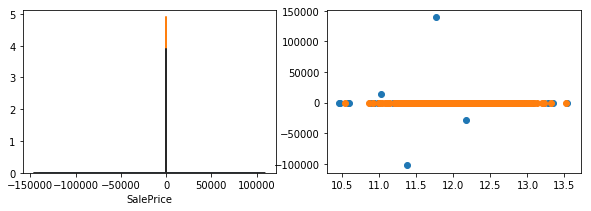

In [78]:
lm = LinearRegression(fit_intercept=True)
X = df.drop(['SalePrice','Id'],axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=101)

lm.fit(X_train,y_train)

pred_test_lm = lm.predict(X_test)
pred_train_lm = lm.predict(X_train)

from scipy.stats import norm

def PlotComparison(y_test,y_train,pred_test,pred_train):
    fig, (ax1,ax2) = plt.subplots(figsize=(10,3),ncols=2)
    sns.distplot((y_test-pred_test),fit=norm,bins=50,ax=ax1)
    sns.distplot((y_train-pred_train),fit=norm,bins=50,ax=ax1)
    plt.scatter(y_test,pred_test)
    plt.scatter(y_train,pred_train)
    print('RMSE test:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
    print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
    
PlotComparison(y_test,y_train,pred_test_lm,pred_train_lm)

/sysroot/home/ekaterina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


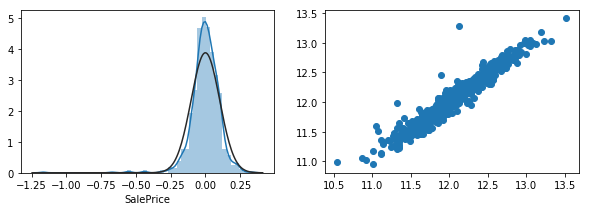

In [72]:
fig, (ax1,ax2) = plt.subplots(figsize=(10,3),ncols=2)
sns.distplot((y_train-pred_train_lm),fit=norm,bins=50,ax=ax1)
plt.scatter(y_train,pred_train_lm)